## Import necessary libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Load the training and testing datasets from CSV files

In [66]:
train = pd.read_csv('Train.csv') #training data
test = pd.read_csv('Test.csv') #testing data

## Display the first few rows of the training dataset 

In [67]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


## Display the first few rows of the testing dataset

In [68]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


### Check the shape of the training dataset

In [69]:
train.shape

(2452, 8)

### Check the shape of the testing dataset

In [70]:
test.shape

(1051, 7)

In [71]:
# Display concise summary of the training dataset including data types and memory usage
print("Train Data Info:")
print(train.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB
None


In [72]:
# Display concise summary of the testing dataset including data types and memory usage
print("\nTest Data Info:")
print(test.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        1051 non-null   object 
 1   Product_Brand  1051 non-null   object 
 2   Item_Category  1051 non-null   object 
 3   Subcategory_1  1051 non-null   object 
 4   Subcategory_2  1051 non-null   object 
 5   Item_Rating    1051 non-null   float64
 6   Date           1051 non-null   object 
dtypes: float64(1), object(6)
memory usage: 57.6+ KB
None


## Print statistical summary of the training dataset

In [73]:
# Display descriptive statistics of the training dataset including count, mean, std, min, 25%, 50%, 75%, and max
print("\nTrain Data Statistics:")
print(train.describe())


Train Data Statistics:
       Item_Rating  Selling_Price
count  2452.000000    2452.000000
mean      3.078467    2494.375612
std       1.187137    7115.256516
min       1.000000      33.000000
25%       2.000000     371.000000
50%       3.100000     596.000000
75%       4.100000    1195.250000
max       5.000000  116289.000000


## Checking for null values in train dataset

In [74]:
null = train.isnull().sum()
null

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

## Visualization

Histogram Representation

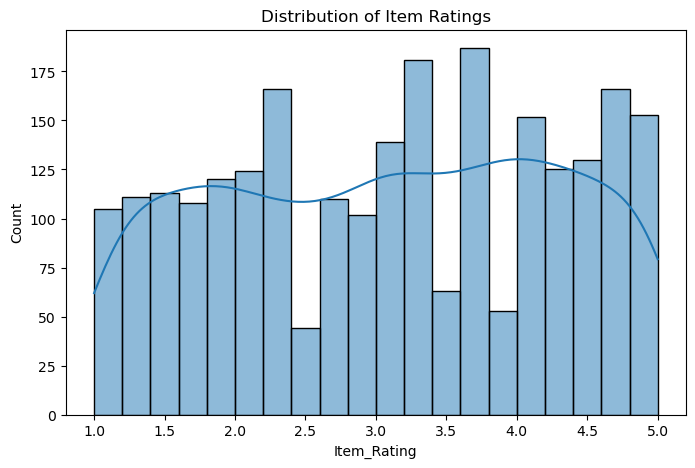

In [75]:
# Displaying the generated plot.
plt.figure(figsize=(8, 5))
sns.histplot(train['Item_Rating'], bins=20, kde=True)
plt.title('Distribution of Item Ratings')
plt.show()

Scatter Plot Between Item Rating and Selling Price

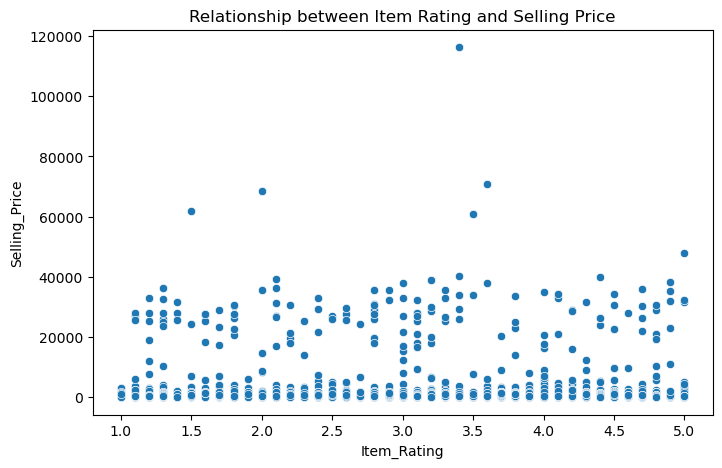

In [76]:
# Displaying the generated plot.
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Rating', y='Selling_Price', data=train)
plt.title('Relationship between Item Rating and Selling Price')
plt.show()

Line Plot

In [77]:
# Converting 'Date' column to datetime format with the correct format
train['Date'] = pd.to_datetime(train['Date'], format='%d/%m/%Y')
test['Date'] = pd.to_datetime(test['Date'], format='%d/%m/%Y')

In [78]:
train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month
train['Year'] = train['Date'].dt.year
test['Year'] = test['Date'].dt.year

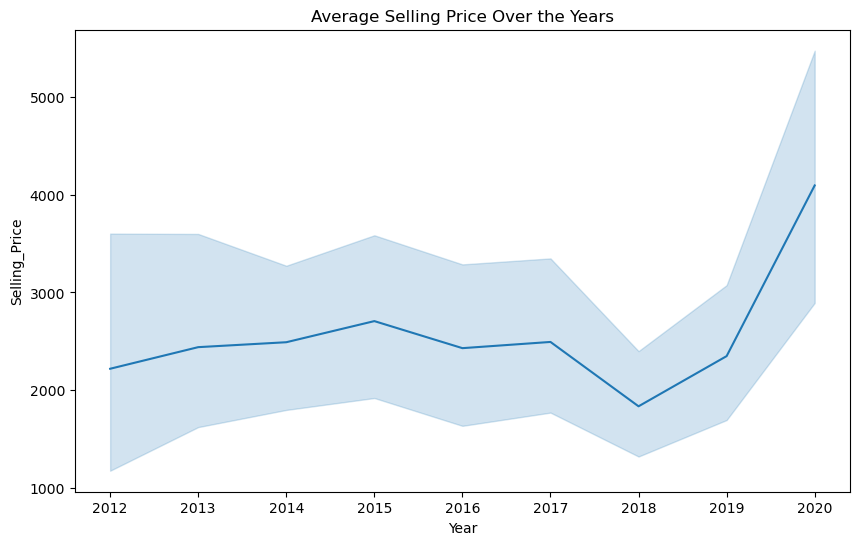

In [79]:
# Displaying the generated plot.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Selling_Price', data=train, estimator='mean')
plt.title('Average Selling Price Over the Years')
plt.show()

Correlation Matrix

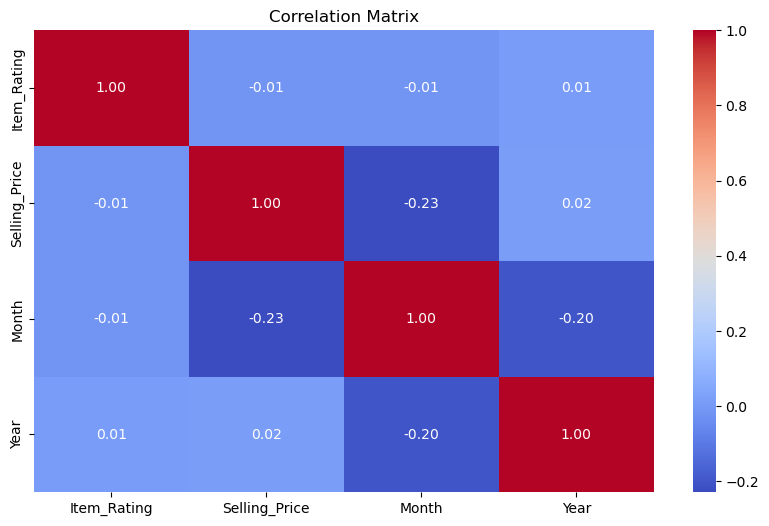

In [80]:
# Calculating the correlation matrix for selected columns
correlation_matrix = train[['Item_Rating', 'Selling_Price', 'Month', 'Year']].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

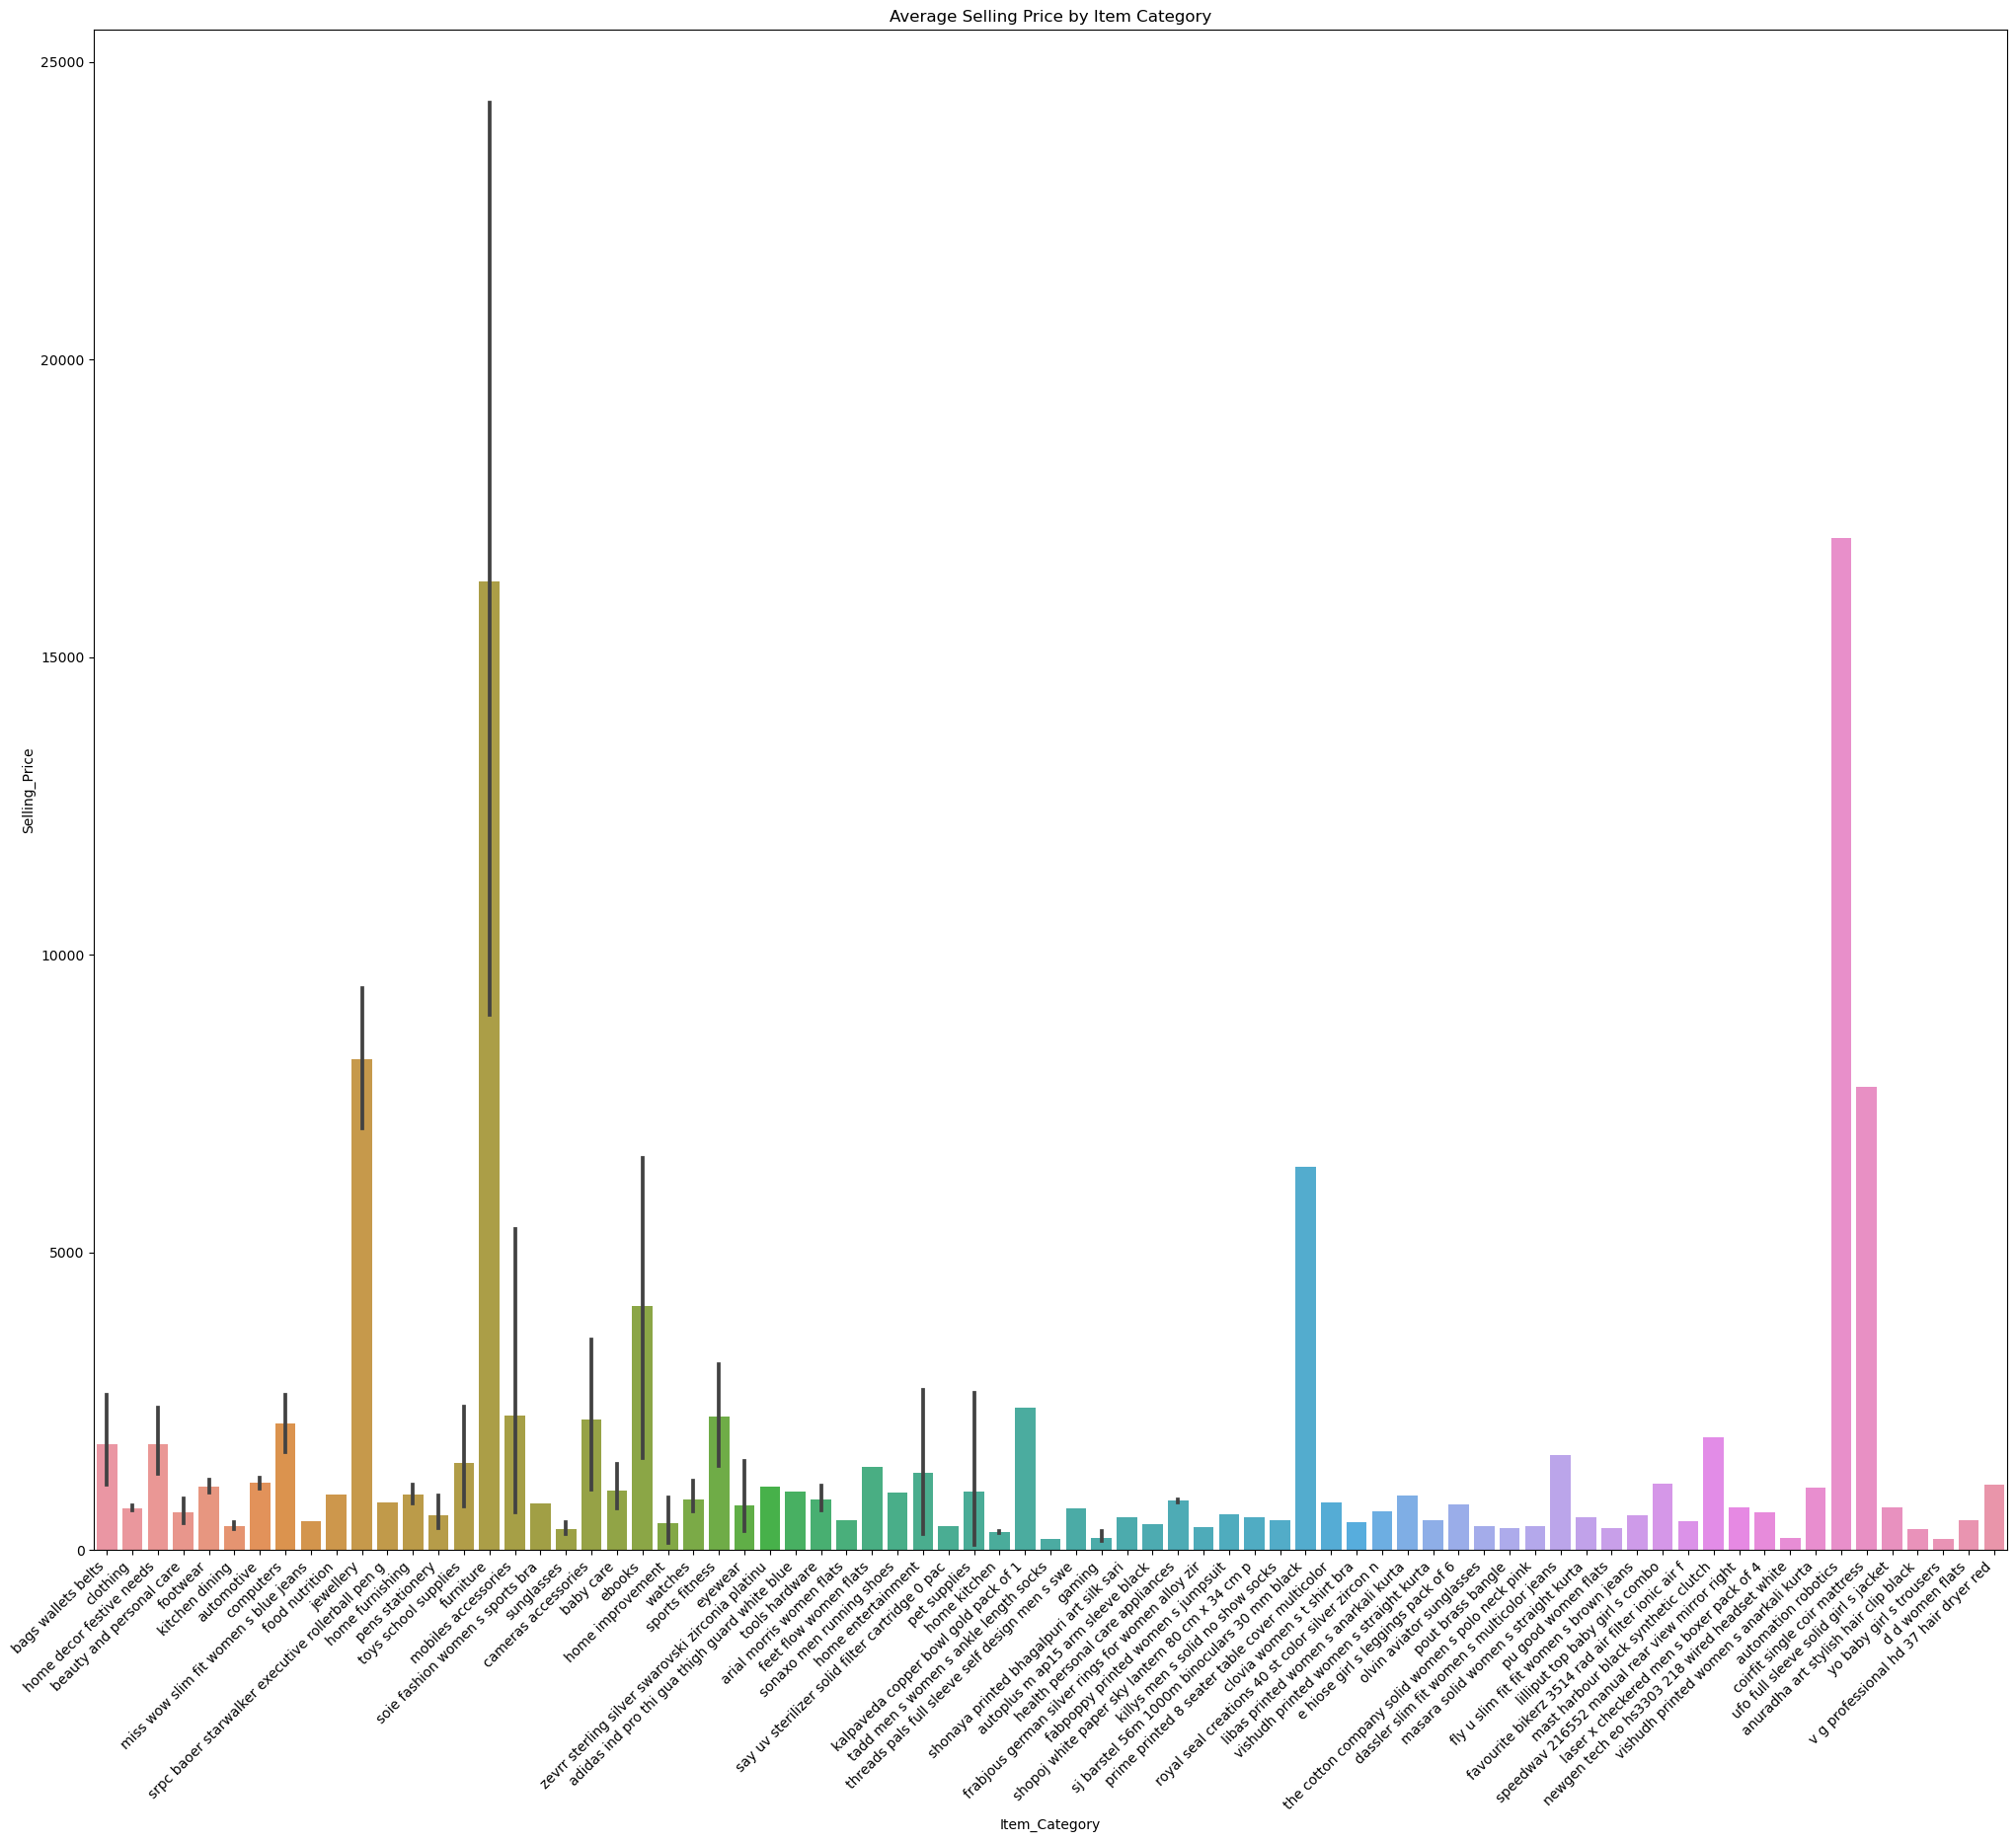

In [81]:
# Creating a bar plot to visualize the average selling price by item category
plt.figure(figsize=(25, 20))  # Increase the figsize for larger visualization
sns.barplot(x='Item_Category', y='Selling_Price', data=train)
plt.title('Average Selling Price by Item Category')
plt.xticks(rotation=45, ha='right')
plt.show()

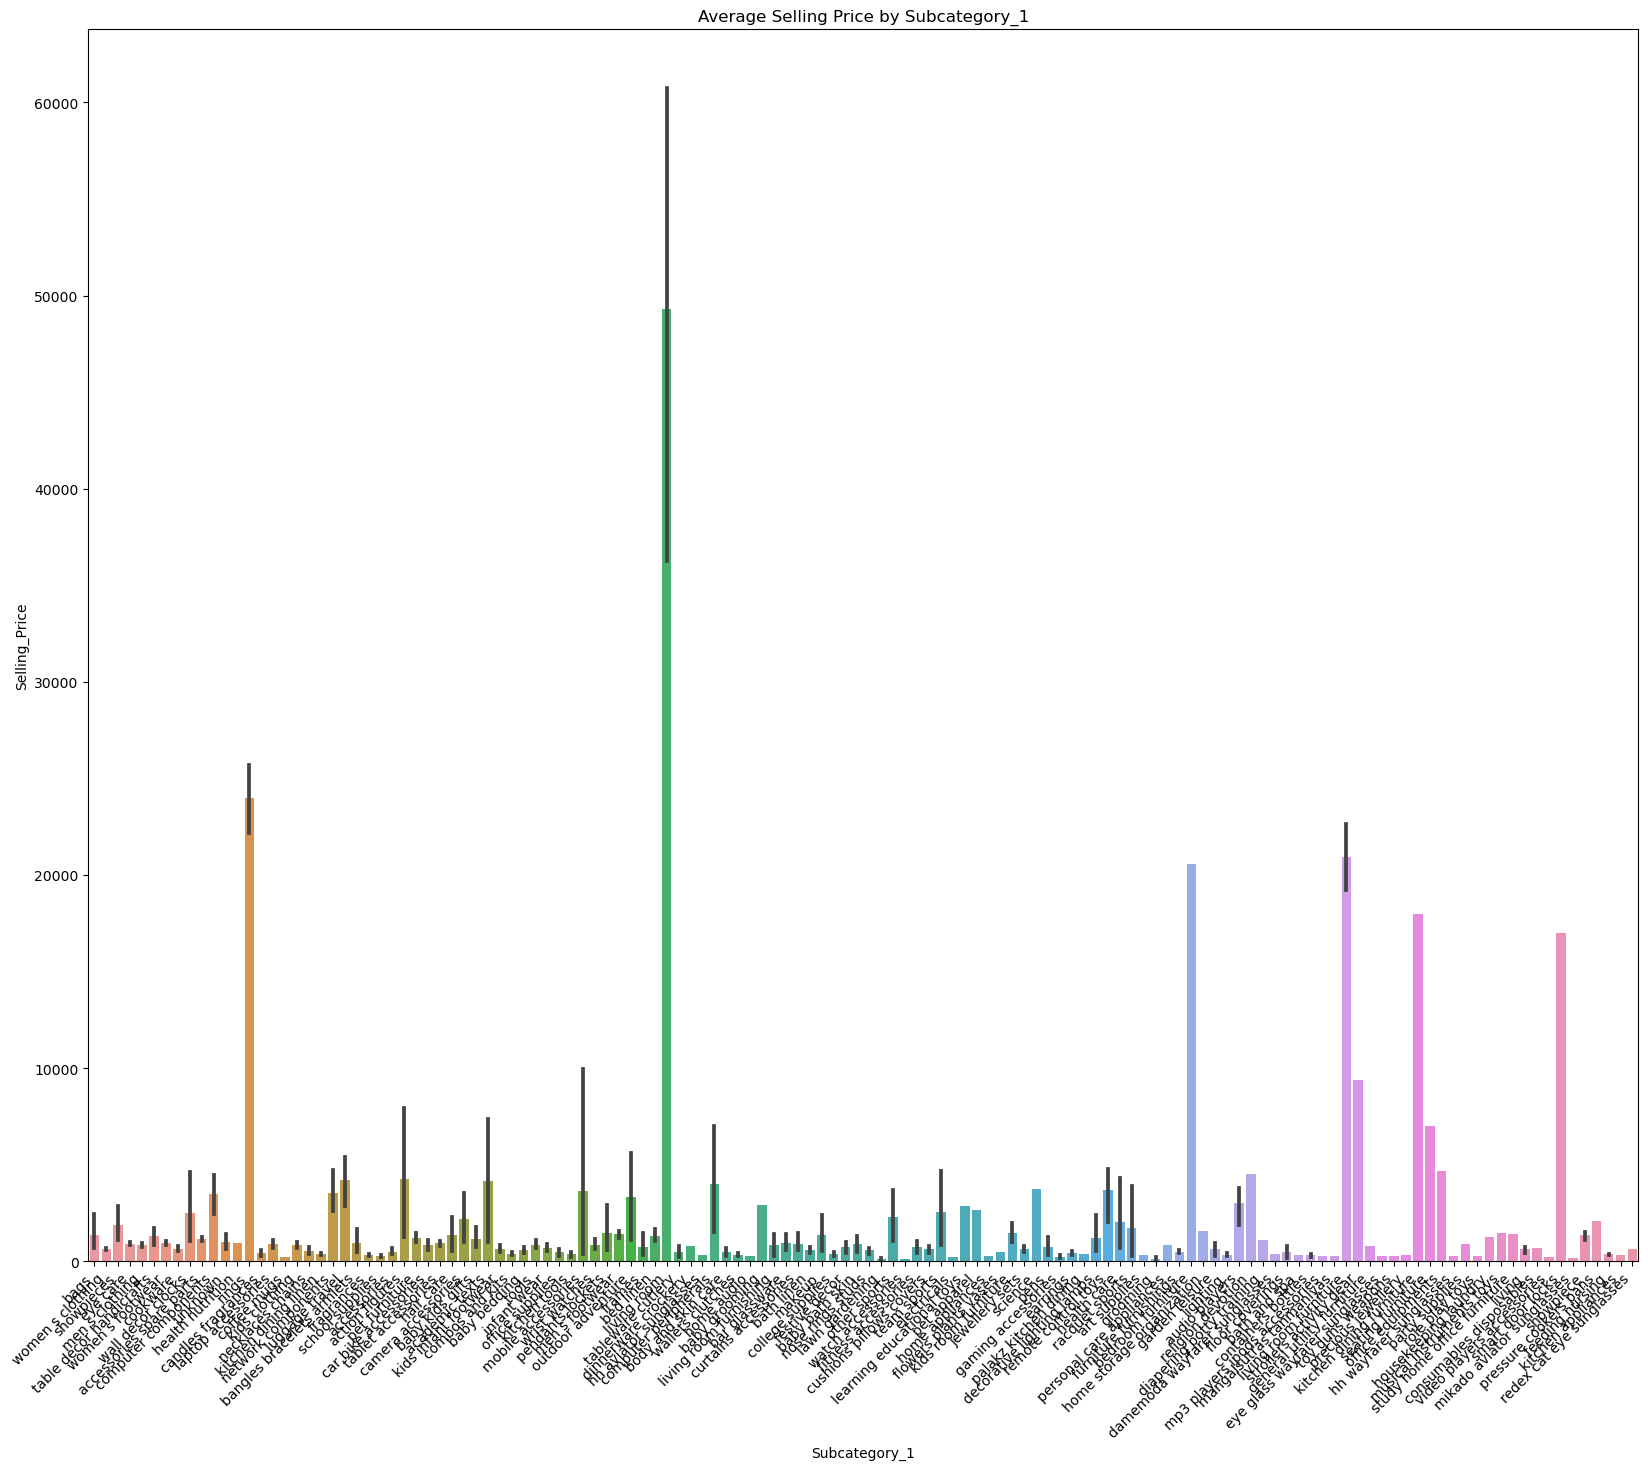

In [82]:
# Create a bar plot to visualize the average selling price by Subcategory_1
plt.figure(figsize=(20, 16))
sns.barplot(x='Subcategory_1', y='Selling_Price', data=train)
plt.title('Average Selling Price by Subcategory_1')
plt.xticks(rotation=45, ha='right')
plt.show()

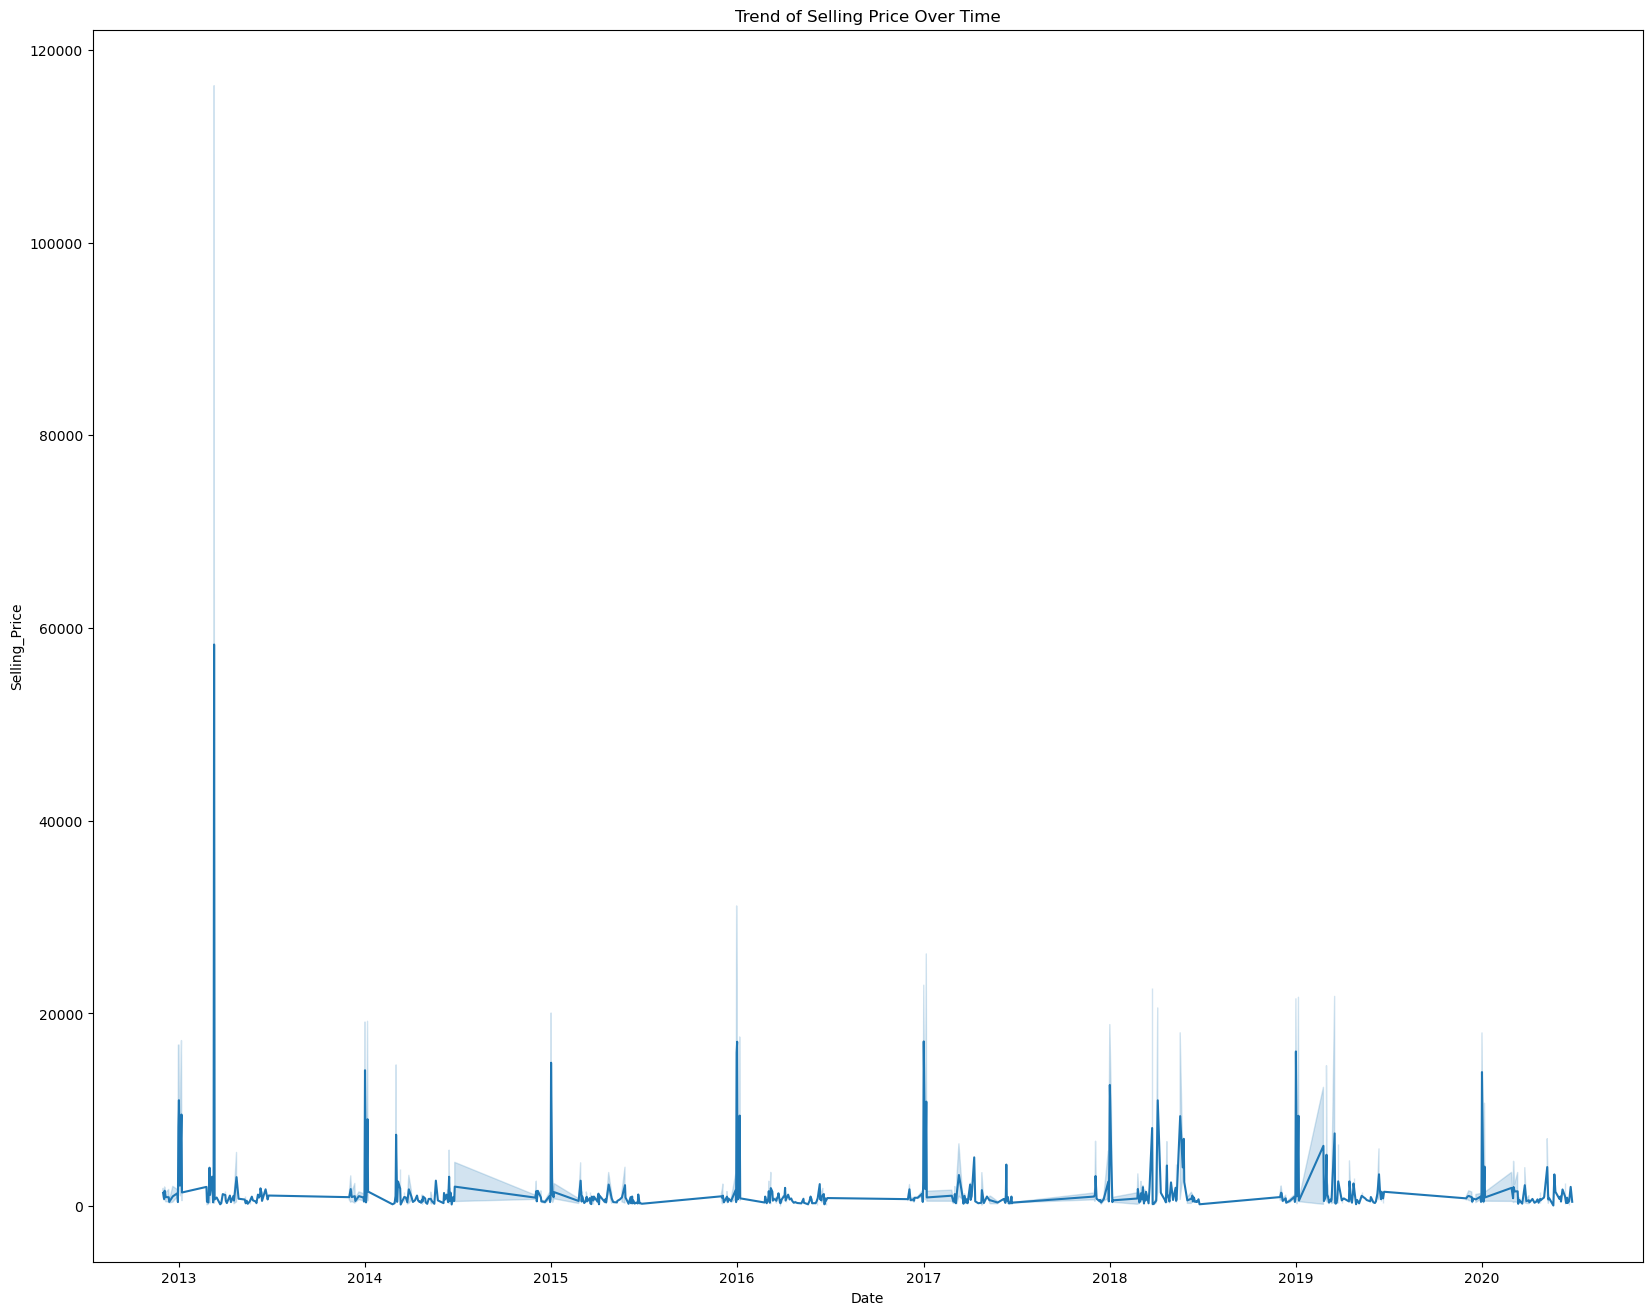

In [83]:
# Create a line plot to visualize the trend of selling price over time
plt.figure(figsize=(20, 16))
sns.lineplot(x='Date', y='Selling_Price', data=train)
plt.title('Trend of Selling Price Over Time')
plt.show()

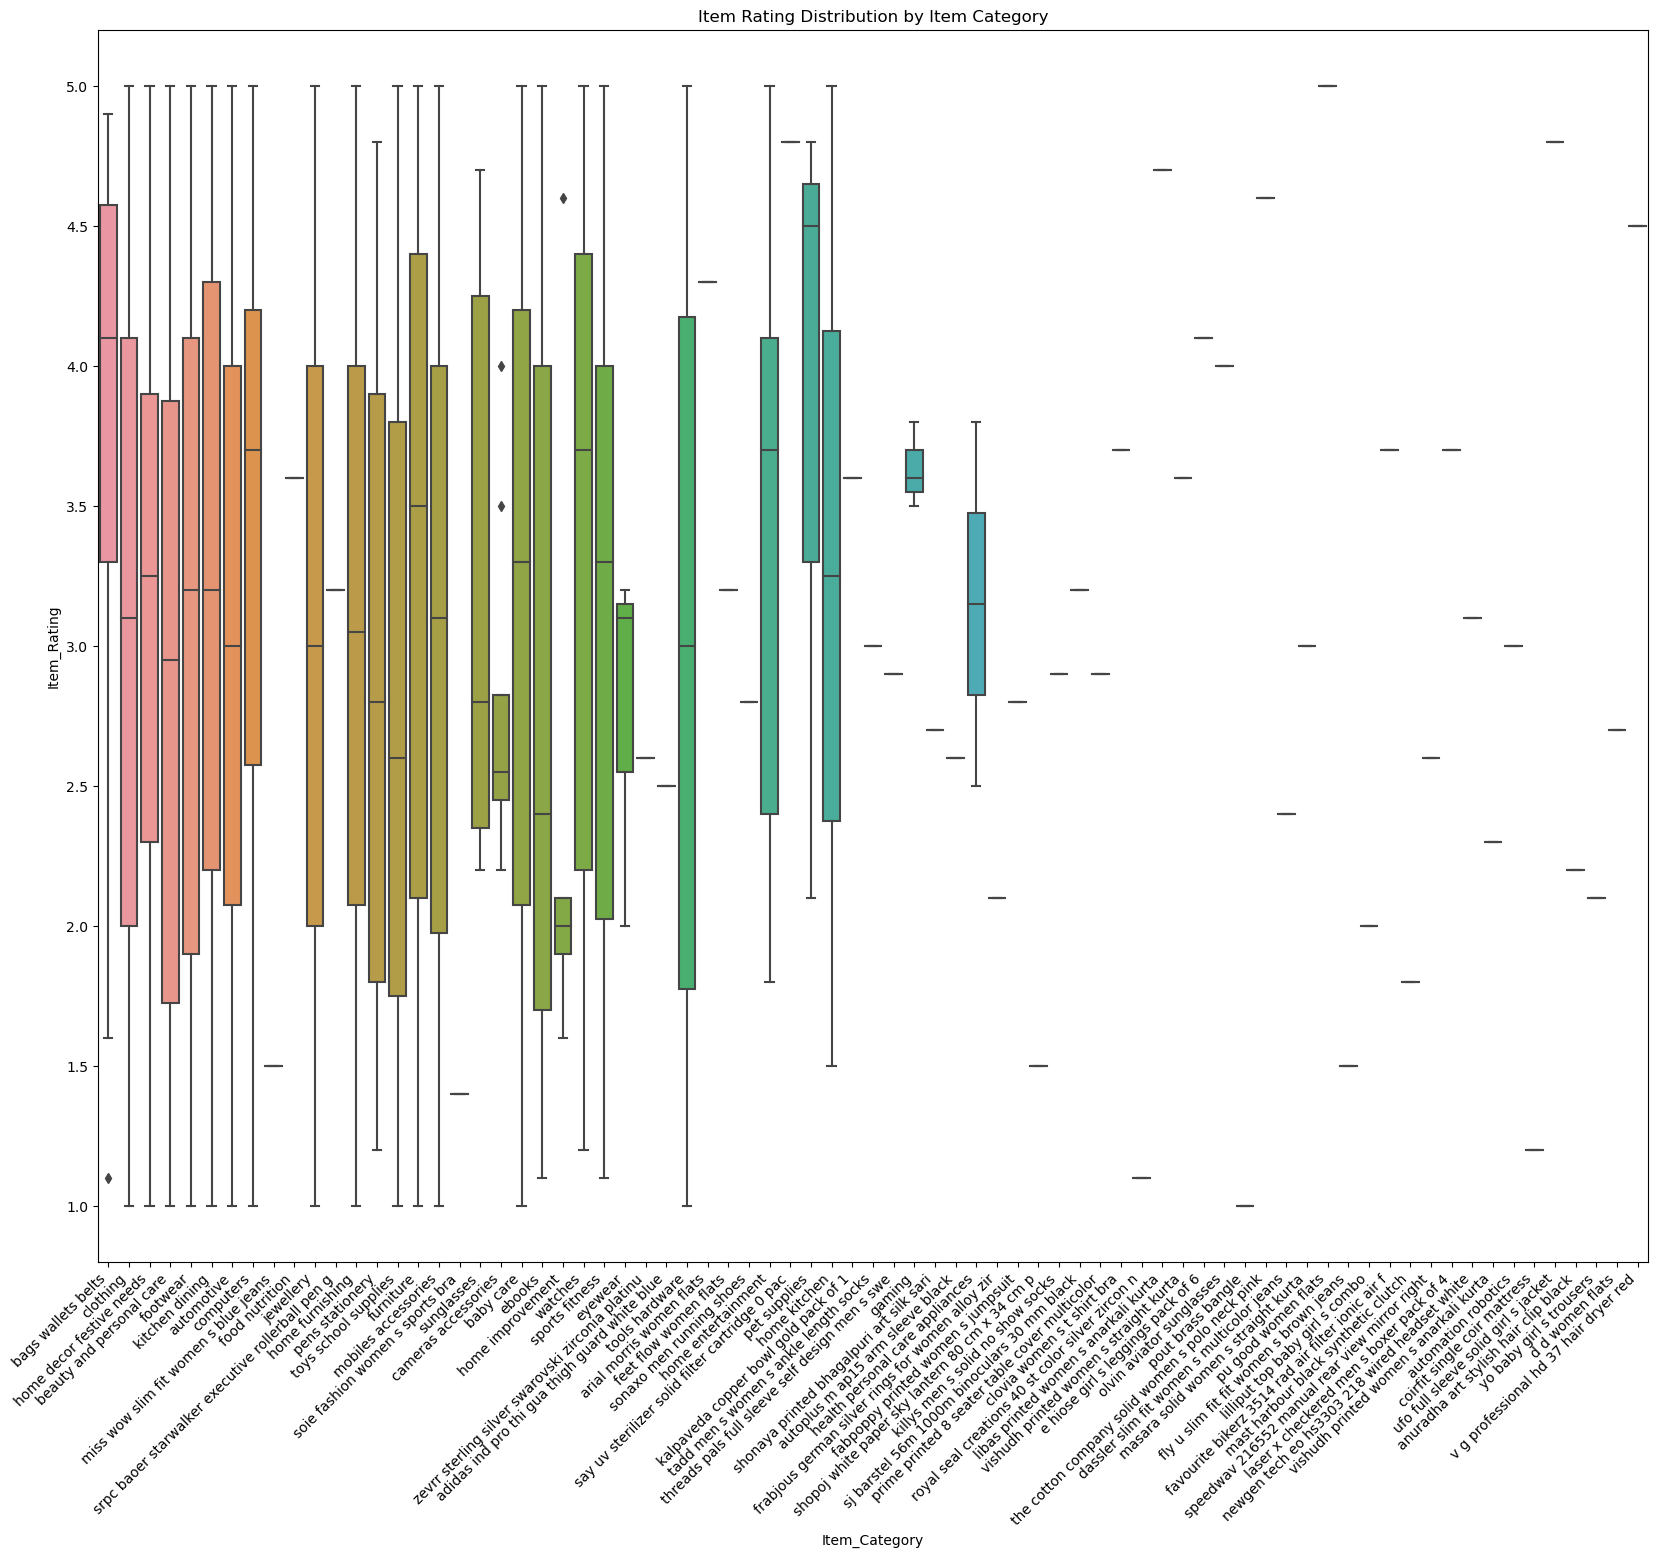

In [84]:
# Creating a box plot to visualize the distribution of item ratings by item category
plt.figure(figsize=(20, 16))
sns.boxplot(x='Item_Category', y='Item_Rating', data=train)
plt.title('Item Rating Distribution by Item Category')
plt.xticks(rotation=45, ha='right')
plt.show()

## Machine Learning Model Building

In [51]:
X = train[['Item_Rating', 'Month', 'Year']] #Independent variables
y = train['Selling_Price'] #Dependent variables

In [52]:
# Splitting the dataset into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [53]:
# Initializing and training the machine learning model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
predictions = model.predict(X_val)

In [55]:
# Calculating model performance metrics.
mse = mean_squared_error(y_val, predictions)
print("\nMean Squared Error on Validation Set:", mse)


Mean Squared Error on Validation Set: 42363280.95649988


In [56]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_val, predictions)
print("\nMean Absolute Error on Validation Set:", mae)

# Calculate R-squared
r2 = r2_score(y_val, predictions)
print("\nR-squared on Validation Set:", r2)


Mean Absolute Error on Validation Set: 3133.0409589114083

R-squared on Validation Set: 0.05211258604030633


## SVM and Random Forest Model

In [57]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Support Vector Machine (SVM) model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_val)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Evaluate SVM model
svm_mse = mean_squared_error(y_val, svm_predictions)
print("\nSupport Vector Machine (SVM) - Mean Squared Error on Validation Set:", svm_mse)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_val, rf_predictions)
print("\nRandom Forest - Mean Squared Error on Validation Set:", rf_mse)



Support Vector Machine (SVM) - Mean Squared Error on Validation Set: 48301458.112467736

Random Forest - Mean Squared Error on Validation Set: 57894723.81766409


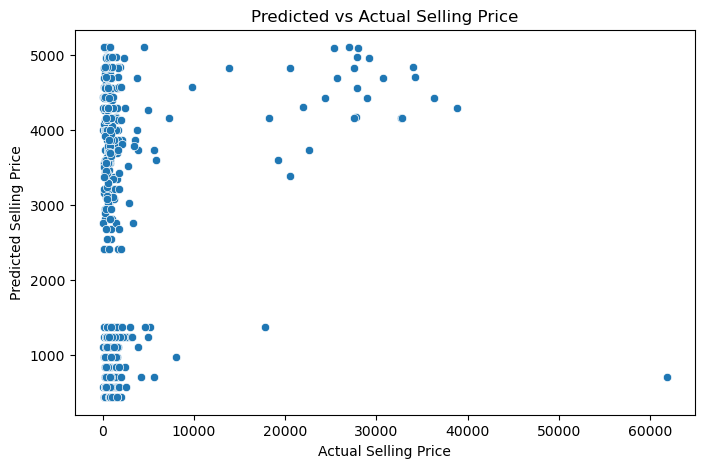

In [58]:
# Create a scatter plot to visualize predicted vs actual selling price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=predictions)
plt.title('Predicted vs Actual Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

In [59]:
# Creating a DataFrame to display the metrics
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_val, predictions)
MSE = metrics.mean_squared_error(y_val, predictions)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,3.133041e+03
MSE,4.236328e+07
RMSE,6.508708e+03


In [60]:
import numpy as np
import pandas as pd
from sklearn import metrics  # Importing metrics module from sklearn

# Calculate metrics for Linear Regression model
MAE_lr = metrics.mean_absolute_error(y_val, predictions)
MSE_lr = metrics.mean_squared_error(y_val, predictions)
RMSE_lr = np.sqrt(MSE_lr)

# Calculate metrics for SVM model
svm_predictions = svm_model.predict(X_val)
MAE_svm = metrics.mean_absolute_error(y_val, svm_predictions)
MSE_svm = metrics.mean_squared_error(y_val, svm_predictions)
RMSE_svm = np.sqrt(MSE_svm)

# Calculate metrics for Random Forest model
rf_predictions = rf_model.predict(X_val)
MAE_rf = metrics.mean_absolute_error(y_val, rf_predictions)
MSE_rf = metrics.mean_squared_error(y_val, rf_predictions)
RMSE_rf = np.sqrt(MSE_rf)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Linear Regression': [MAE_lr, MSE_lr, RMSE_lr],
    'SVM': [MAE_svm, MSE_svm, RMSE_svm],
    'Random Forest': [MAE_rf, MSE_rf, RMSE_rf]
}, index=['MAE', 'MSE', 'RMSE'])

print(results_df)


      Linear Regression           SVM  Random Forest
MAE        3.133041e+03  2.104171e+03   3.270996e+03
MSE        4.236328e+07  4.830146e+07   5.789472e+07
RMSE       6.508708e+03  6.949925e+03   7.608858e+03


In [85]:
import pickle
# Open a file in binary write mode to save the model
pickle_out = open("model.pkl","wb")
#save the trained model to the file
pickle.dump(model, pickle_out)
pickle_out.close()